# Задание 1.1

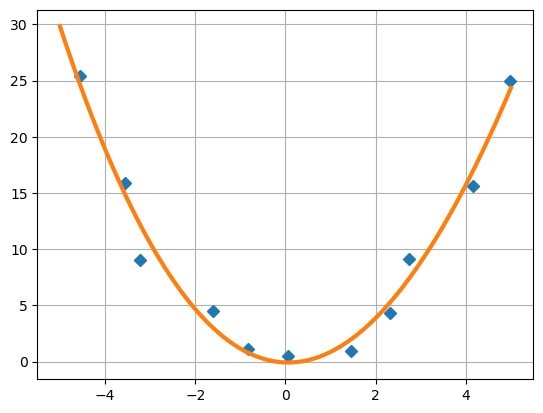

In [8]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
#генерируем случайные x и y
delta = 1.0
x = np.linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

m = np.vstack((x ** 3, x ** 2, x, np.ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5, 5]
x_prec = np.linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()

# Задание 1.2

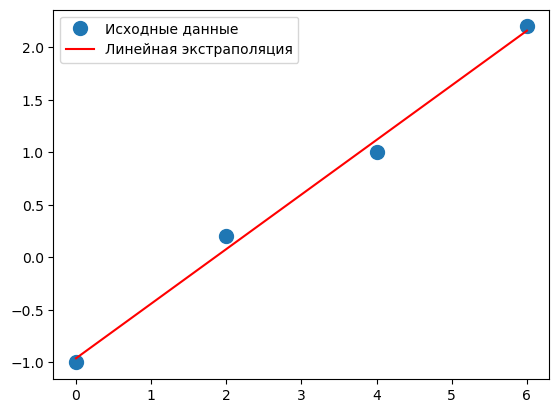

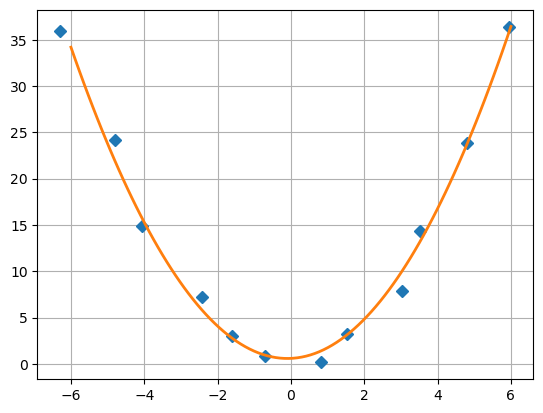

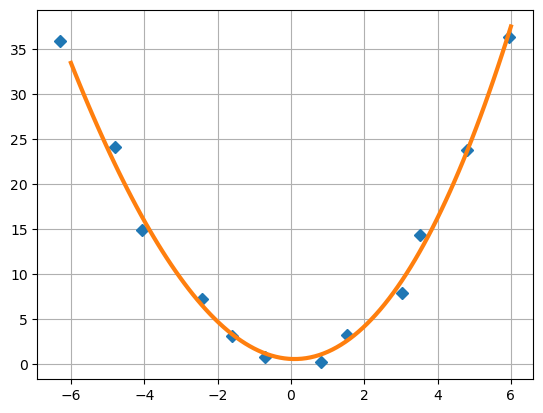

In [11]:
from numpy import *

x = array([0,2,4,6])
y = array([-1, 0.2, 1.0, 2.2])

A = vstack((x, ones(len(x)))).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

delta = 1.0
x = linspace(-6, 6, 12)
y = x**2+delta*(rand(12)-0.4)
x += delta*(rand(12)-0.4)

m = vstack((x ** 2, x, ones(12))).T

s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-6, 6, 102)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.show()

m = vstack((x ** 3, x ** 2, x, ones(12))).T

s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-6, 6, 102)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.show()

# Задание 1.3

[0.31135802 0.89823595 0.59962181]
5.64348439485348e-05
0.25164738899464506


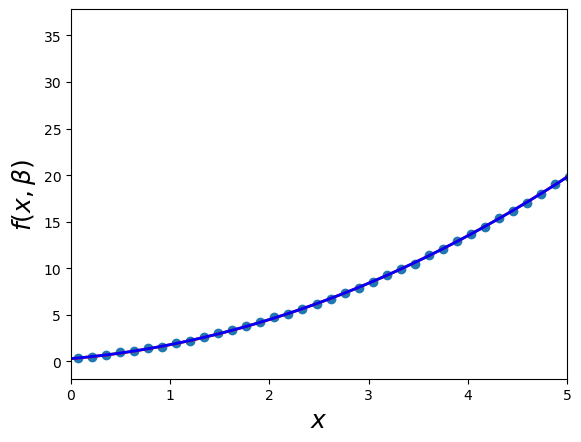

In [8]:
import scipy.optimize as sco

beta = (0.3, 0.9, 0.6)
def f1(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = linspace(-7, 7, 100)

y = f1(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = sco.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# Задание 2.1

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


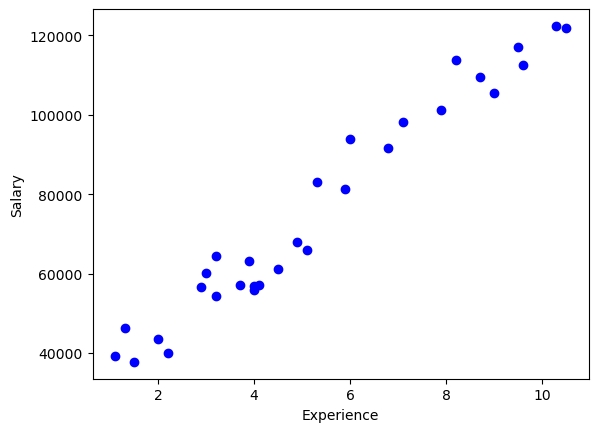

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


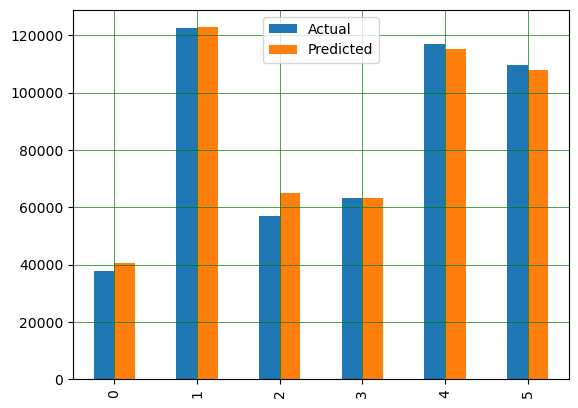

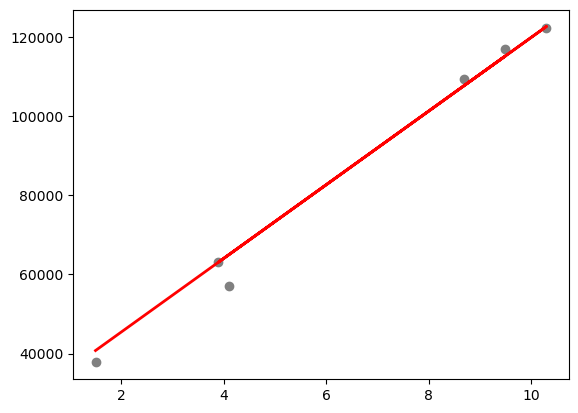

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Salary data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

#
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#
#
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

# Задание 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

y = list(dataset['Petrol_tax'])
x = [list(dataset['Average_income']),
        list(dataset['Paved_Highways']),
        list(dataset['Population_Driver_licence(%)']),
        list(dataset['Petrol_Consumption'])]

new_y = np.array(y).transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x).transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
     y      x1      x2     x3      3
0  9.0  3571.0  1976.0  0.525  541.0
1  9.0  4092.0  1250.0  0.572  524.0
2  9.0  3865.0  1586.0  0.580  561.0
3  7.5  4870.0  2351.0  0.529  414.0
4  8.0  4399.0   431.0  0.544  410.0
(48, 5)
               y           x1            x2         x3           3
count  48.000000    48.000000     48.000000  48.000000   48.000000
mean    7.668333 